In [1]:
#autograd:自动微分（automatic differentiation）
'''
该autograd包是pytorch中所有神经的核心。让我们简单地访问它，然后
训练我们第一个基于torch的神经网络。
该autograd软件包为tensor上的所有操作提供自动微分。他是一个由运行定义的框架，
这意味着以代码运行方式定义你的后向传播，并且每次迭代都可以不同。我们从tensor和gradients来举一些例子。

1. 张量
torch.tensor是程序的中心类。如果将其属性设置.requires_grad为True，它将开始跟踪对其的所有操作。
完成计算后，可以调用.backward()并自动计算所有的梯度。该张量的梯度将累加到.grad属性中。
要停止张量跟踪历史记录，调用.detach()将其从计算历史记录中分离出来，并防止跟踪将来
的计算。
要停止跟踪历史记录（和使用内存），还可以将代码块包装在torch.no_grad()中：这在评估模型时特别有
用，因为模型的可训练参数有requires_grad=Ture，但我们在评估阶段不需要它梯度。

还有一个类对autograd实现非常重要那就是Function。Tensor和Function相互连接并构建一个非循环图，它保存整个完整的计算过程的历史信息。
每个张量都有一个.grad_fn属性保存着创建了张量的Function的引用，（如果用户自己创建张量，则grad_fn是None）。

如果想计算导数，可以调用Tensor.backward()。如果Tensor是标量（即它包含一个元素数据），则不需要制定任何参数backward（），但是如果他有更多元素，则需要指定
一个gradient参数来指定张量的形状。

'''
import torch

#创建一个张量，设置requires_grad=True
x = torch.ones(2,2,requires_grad=True)

In [2]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [3]:
y = x + 2
# y作为操作的结果被创建，所以它哟grad_fn
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [4]:
# 针对y做更多的操作：
z = y*y*3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [5]:
#.requires_grad_()会改变张量的requires_grad标记。输入的标记默认为False，如果没有提供相应的参数
a = torch.randn(2,2)
a = ((a*3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


In [6]:
# 梯度：我们现在后向传播，因为输出包含了一个标量，out.backward()等同于out.backward(torch.tensor(1.))
out.backward()


In [7]:
#打印梯度d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


将out张量称为o，o=1/4(z1+z2+z3+z4),zi=3(xi+2)^2并且z(x1)=3*(1+2)^2=27，所以
o对x1的偏导数为3/2(x1+2)=4.5
数学上，如果具有向量y=f(x),其中y和x为向量，其雅可比矩阵为
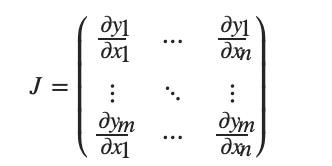
一般来说，torch.autograd是用于计算向量雅可比积的引擎。也就是说，给定任何向量v，计算产品vT·j。如果恰好标量函数的梯度l=g(y)

In [8]:
#现在让我们看一个雅可比向量积的例子
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    print(y)
    y = y * 2
    
print(y)
#现在在这种情况下，y不再是一个标量。torch.autograd不能够直接计算整个

tensor([-0.2453, -1.0183, -2.5605], grad_fn=<MulBackward0>)
tensor([-0.4906, -2.0365, -5.1210], grad_fn=<MulBackward0>)
tensor([ -0.9812,  -4.0730, -10.2420], grad_fn=<MulBackward0>)
tensor([ -1.9624,  -8.1461, -20.4839], grad_fn=<MulBackward0>)
tensor([ -3.9248, -16.2922, -40.9679], grad_fn=<MulBackward0>)
tensor([ -7.8497, -32.5843, -81.9358], grad_fn=<MulBackward0>)
tensor([ -15.6993,  -65.1687, -163.8715], grad_fn=<MulBackward0>)
tensor([ -31.3986, -130.3373, -327.7430], grad_fn=<MulBackward0>)
tensor([ -62.7972, -260.6747, -655.4860], grad_fn=<MulBackward0>)
tensor([ -125.5944,  -521.3493, -1310.9720], grad_fn=<MulBackward0>)


In [9]:
#现在这种情况下y不再是标量。torch.autograd无法直接计算完整的雅可比行列式，但是如果我们只想要向量-雅可比积，只需要将向量传递给backward作为参数。
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [10]:
#你可以通过将代码包裹在with torch.no_grad(),来停止对从跟踪历史中的.requires_grad=True的张量自动求导。
print(x.requires_grad)

True


In [11]:
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
False
